In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Decision tree

In [4]:
y_data= df.iloc[:, -1]

In [5]:
x_data= df.drop(['species'], axis= 1)

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test= train_test_split(x_data, y_data, random_state=0, test_size= 0.2)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree= DecisionTreeClassifier(criterion= 'entropy')

In [10]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
prediction= dtree.predict(x_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score

conf_matrix=confusion_matrix(y_test,prediction)
accuracy=accuracy_score(y_test,prediction)

In [14]:
conf_matrix, accuracy

(array([[11,  0,  0],
        [ 0, 13,  0],
        [ 0,  0,  6]], dtype=int64), 1.0)

# Using KNN

In [15]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [16]:
#label Encoding-> To convert string to numerical Value

from sklearn import preprocessing

l_en= preprocessing.LabelEncoder()
df['species']= l_en.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
x_dataK= df.drop(['species'], axis=1)
y_dataK= df.iloc[:, -1]

In [18]:
from sklearn.preprocessing import StandardScaler

scalar= StandardScaler()
scalar.fit(x_dataK)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_features= scalar.transform(x_dataK)

df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_feat, y_dataK, random_state=0, test_size=0.3)

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [23]:
pred = knn.predict(X_test)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

conf_mat= confusion_matrix(y_test, pred)
accuracy= accuracy_score(y_test, pred)

In [25]:
conf_mat, accuracy

(array([[16,  0,  0],
        [ 0, 17,  1],
        [ 0,  1, 10]], dtype=int64), 0.9555555555555556)

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.94      0.94        18
           2       0.91      0.91      0.91        11

   micro avg       0.96      0.96      0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [29]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

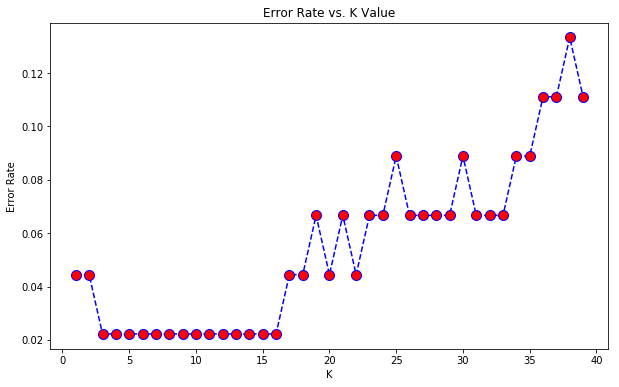

In [30]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

print(accuracy_score(y_test, pred))



[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

   micro avg       0.98      0.98      0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

0.9777777777777777


# Support vector Machine

In [37]:
from sklearn.svm import SVC

model= SVC()

In [39]:
model.fit(X_train,y_train)

D:\ML\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [40]:
model.score(X_test, y_test)

0.9777777777777777

In [44]:
acc= []

for i in range(1,100):
    svc= SVC(C=i, gamma= 'scale')
    svc.fit(X_train, y_train)
    acc.append(svc.score(X_test, y_test))

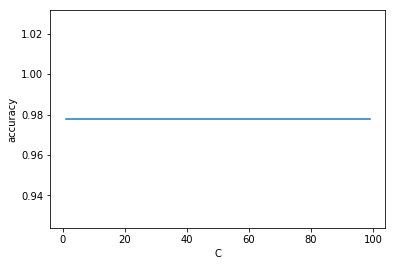

In [45]:
plt.plot(range(1,100), acc)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()